In [48]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [7]:
P_data1 = pd.read_csv('data/total_precipitation/precip_2000_2011.csv')
P_data2 = pd.read_csv('data/total_precipitation/precip_2012_2023.csv')
P_data = pd.concat([P_data1, P_data2])
P_data.head()

,date,lat,lon,tp
0,2000-01-01,55.25,4.75,0.003465
1,2000-01-01,55.25,5.25,0.003525
2,2000-01-01,55.25,5.75,0.003562
3,2000-01-01,55.25,6.25,0.003803
4,2000-01-01,55.25,6.75,0.004075


In [8]:
P_data['lon'].unique()

array([ 4.75,  5.25,  5.75,  6.25,  6.75,  7.25,  7.75,  8.25,  8.75,
        9.25,  9.75, 10.25, 10.75, 11.25, 11.75, 12.25, 12.75, 13.25,
       13.75, 14.25, 14.75, 15.25])

In [6]:
P_data['lat'].unique()

array([55.25, 54.75, 54.25, 53.75, 53.25, 52.75, 52.25, 51.75, 51.25,
       50.75, 50.25, 49.75, 49.25, 48.75, 48.25, 47.75, 47.25, 46.75,
       46.25, 45.75, 45.25, 44.75])

In [24]:
lat = 53.25
lon = 10.25
P_sample = P_data[(P_data['lon'] == lon) & (P_data['lat'] == lat)]
P_sample['date'] = pd.to_datetime(P_sample['date'])
P_sample.set_index('date', inplace=True)

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_21740\1036146385.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P_sample['date'] = pd.to_datetime(P_sample['date'])


In [25]:
P_sample.head()

,lat,lon,tp
date,,,
2000-01-01,53.25,10.25,0.002498
2000-01-02,53.25,10.25,0.000402
2000-01-03,53.25,10.25,0.002941
2000-01-04,53.25,10.25,0.005187
2000-01-05,53.25,10.25,0.000724


In [35]:
P_sample['rolling_std_month'] = P_sample['tp'].rolling(window=30).std()
P_sample['rolling_std_year'] = P_sample['tp'].rolling(window=365).std()

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_21740\2863822840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P_sample['rolling_std_month'] = P_sample['tp'].rolling(window=30).std()
C:\Users\Nutzer\AppData\Local\Temp\ipykernel_21740\2863822840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P_sample['rolling_std_year'] = P_sample['tp'].rolling(window=365).std()


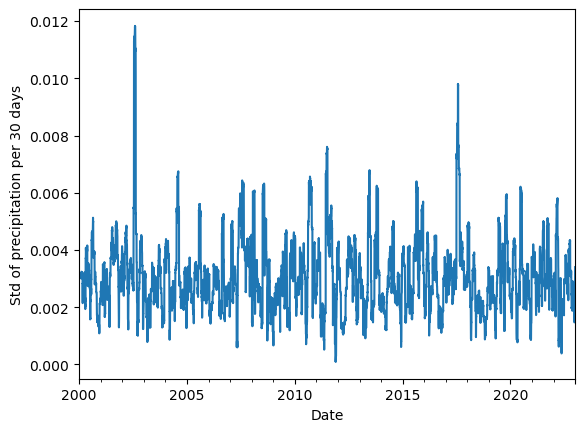

In [34]:
P_sample['rolling_std_month'].plot()
plt.xlabel('Date')
plt.ylabel('Std of precipitation per 30 days')
plt.show()

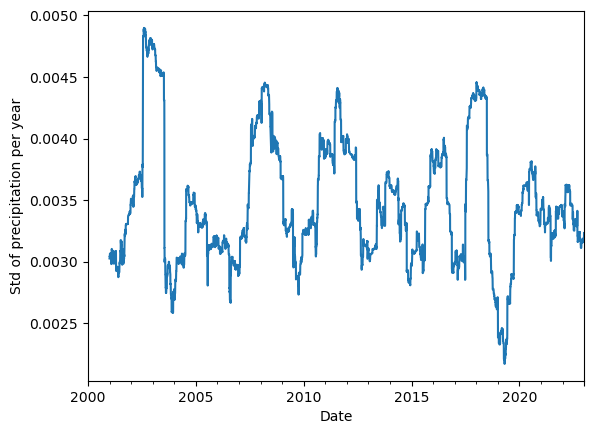

In [36]:
P_sample['rolling_std_year'].plot()
plt.xlabel('Date')
plt.ylabel('Std of precipitation per year')
plt.show()

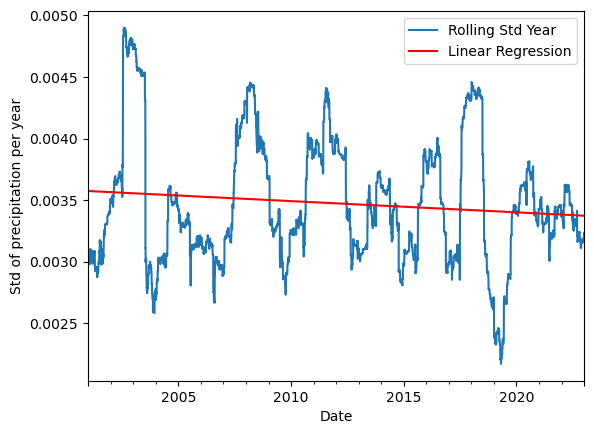

In [46]:
P_sample_clean = P_sample.dropna(subset=['rolling_std_year'])

# Fit a linear regression line
x = np.array(range(len(P_sample_clean.index)))
y = P_sample_clean['rolling_std_year'].values
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)

# Plot the data and the regression line
P_sample_clean['rolling_std_year'].plot(label='Rolling Std Year')
plt.plot(P_sample_clean.index, polynomial(x), color='red', label='Linear Regression')
plt.xlabel('Date')
plt.ylabel('Std of precipitation per year')
plt.legend()
plt.show()

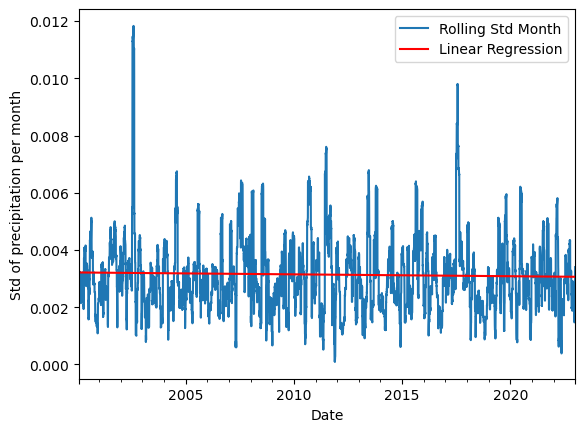

In [47]:
P_sample_clean = P_sample.dropna(subset=['rolling_std_month'])

# Fit a linear regression line
x = np.array(range(len(P_sample_clean.index)))
y = P_sample_clean['rolling_std_month'].values
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)

# Plot the data and the regression line
P_sample_clean['rolling_std_month'].plot(label='Rolling Std Month')
plt.plot(P_sample_clean.index, polynomial(x), color='red', label='Linear Regression')
plt.xlabel('Date')
plt.ylabel('Std of precipitation per month')
plt.legend()
plt.show()

In [49]:
# Add a constant to the x values to represent the intercept
X = sm.add_constant(x)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print out the statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     8.697
Date:                Mon, 06 May 2024   Prob (F-statistic):            0.00320
Time:                        12:52:45   Log-Likelihood:                 43469.
No. Observations:                8372   AIC:                        -8.693e+04
Df Residuals:                    8370   BIC:                        -8.692e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032   2.94e-05    109.243      0.0